## Assignment-1 (CSAI)
### Akshit Sharma (2021101029)

### ROI: Superior Frontal, Subject: Subj3, Contrast/X: 'Bottle'

In [132]:
from nilearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [133]:
subj3 = datasets.fetch_haxby(subjects=[3])

In [134]:
data=pd.read_csv('./data/subj3/vt/features.csv', delimiter=' ', header=None)
dt=data.to_numpy()
behavioral = pd.read_csv(subj3['session_target'][0], sep=" ")
conditions = behavioral["labels"]

#### Loading Superior Frontal features (ROI)

In [135]:
data_roi=pd.read_csv('./data/subj3/Superior_frontal/RL/features.csv', delimiter=' ', header=None)
dt_roi=data_roi.to_numpy()

### Ventral Temporal (All Features)

#### Face vs House

In [136]:
condition_mask = conditions.isin(["face", "house"])
condition_mask_array = np.array(condition_mask)
X = dt[condition_mask_array]
y = conditions[condition_mask]
lab_enc=LabelEncoder()
y_enc=lab_enc.fit_transform(y)
group_size=int(X.shape[0]/12)
acc_vtfh=[]
for i in range(12):
    start=i*group_size
    end=(i+1)*group_size
    test_x=X[start:end,:]
    test_y=y_enc[start:end]
    train_x=np.concatenate([X[:start, :], X[end:, :]])
    train_y=np.concatenate([y_enc[:start], y_enc[end:]])
    scalar=StandardScaler()
    train_x=scalar.fit_transform(train_x)
    test_x=scalar.transform(test_x)
    classifier=LinearSVC(dual='auto')
    classifier.fit(train_x,train_y)
    pred=classifier.predict(test_x)
    acc_vtfh.append(accuracy_score(test_y,pred))
vt_fvh=np.mean(acc_vtfh)
print(np.mean(acc_vtfh))
std_vtfh=np.std(acc_vtfh)
print(np.std(acc_vtfh))

0.9861111111111112
0.024056261216234415


#### Face vs X (X is 'Bottle' for me)

In [137]:
condition_mask = conditions.isin(["face", "bottle"])
condition_mask_array = np.array(condition_mask)
X = dt[condition_mask_array]
y = conditions[condition_mask]
lab_enc=LabelEncoder()
y_enc=lab_enc.fit_transform(y)
group_size=int(X.shape[0]/12)
acc_vtfx=[]
for i in range(12):
    start=i*group_size
    end=(i+1)*group_size
    test_x=X[start:end,:]
    test_y=y_enc[start:end]
    train_x=np.concatenate([X[:start, :], X[end:, :]])
    train_y=np.concatenate([y_enc[:start], y_enc[end:]])
    scalar=StandardScaler()
    train_x=scalar.fit_transform(train_x)
    test_x=scalar.transform(test_x)
    classifier=LinearSVC(dual='auto')
    classifier.fit(train_x,train_y)
    pred=classifier.predict(test_x)
    acc_vtfx.append(accuracy_score(test_y,pred))
vt_fvx=np.mean(acc_vtfx)
print(np.mean(acc_vtfx))
std_vtfx=np.std(acc_vtfx)
print(np.std(acc_vtfx))

0.9027777777777778
0.06851226197661453


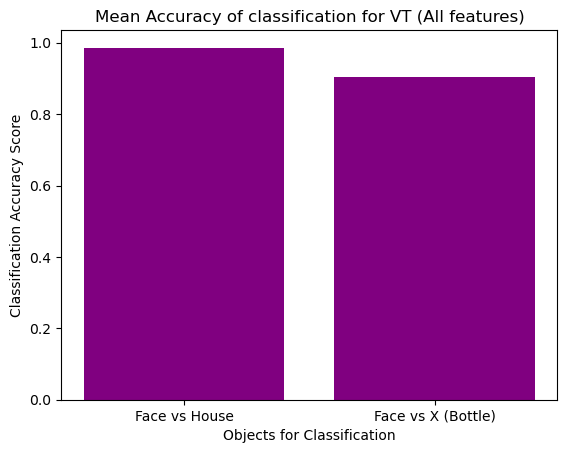

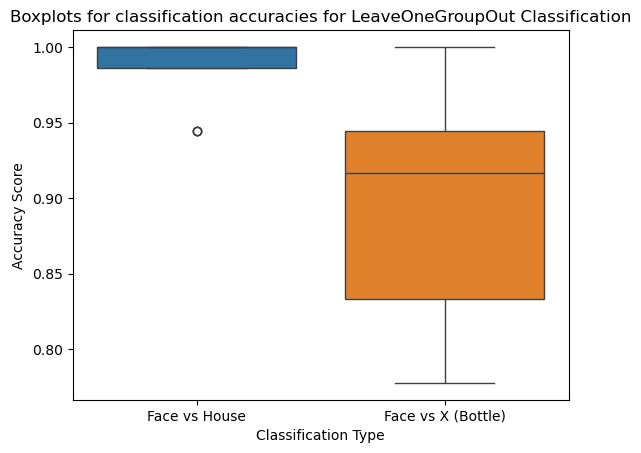

In [138]:
plt.bar(['Face vs House','Face vs X (Bottle)'], [vt_fvh,vt_fvx], color='purple')
plt.xlabel('Objects for Classification')
plt.ylabel('Classification Accuracy Score')
plt.title('Mean Accuracy of classification for VT (All features)')
plt.show()
df = pd.DataFrame({'Face vs House': acc_vtfh, 'Face vs X (Bottle)': acc_vtfx})
sns.boxplot(data=df)
plt.xlabel('Classification Type')
plt.ylabel('Accuracy Score')
plt.title('Boxplots for classification accuracies for LeaveOneGroupOut Classification')
plt.show()

### Ventral Temporal (50% random features)

#### Face vs House

In [139]:
condition_mask = conditions.isin(["face", "house"])
condition_mask_array = np.array(condition_mask)
X = dt[condition_mask_array]
selected_columns_indices = np.random.choice(np.arange(X.shape[1]), size=int(X.shape[1]/2), replace=False)
X=X[:, selected_columns_indices]
y=conditions[condition_mask]
lab_enc=LabelEncoder()
y_enc=lab_enc.fit_transform(y)
group_size=int(X.shape[0]/12)
acc_vthfh=[]
for i in range(12):
    start=i*group_size
    end=(i+1)*group_size
    test_x=X[start:end,:]
    test_y=y_enc[start:end]
    train_x=np.concatenate([X[:start, :], X[end:, :]])
    train_y=np.concatenate([y_enc[:start], y_enc[end:]])
    scalar=StandardScaler()
    train_x=scalar.fit_transform(train_x)
    test_x=scalar.transform(test_x)
    classifier=LinearSVC(dual='auto')
    classifier.fit(train_x,train_y)
    pred=classifier.predict(test_x)
    acc_vthfh.append(accuracy_score(test_y,pred))
vthalf_fvh=np.mean(acc_vthfh)
print(np.mean(acc_vthfh))
std_vthfh=np.std(acc_vthfh)
print(np.std(acc_vthfh))

0.976851851851852
0.04217793323677917


#### Face vs X (X is 'Bottle' for me)

In [140]:
condition_mask = conditions.isin(["face", "bottle"])
condition_mask_array = np.array(condition_mask)
X = dt[condition_mask_array]
selected_columns_indices = np.random.choice(np.arange(X.shape[1]), size=int(X.shape[1]/2), replace=False)
X=X[:, selected_columns_indices]
y=conditions[condition_mask]
lab_enc=LabelEncoder()
y_enc=lab_enc.fit_transform(y)
group_size=int(X.shape[0]/12)
acc_vthfx=[]
for i in range(12):
    start=i*group_size
    end=(i+1)*group_size
    test_x=X[start:end,:]
    test_y=y_enc[start:end]
    train_x=np.concatenate([X[:start, :], X[end:, :]])
    train_y=np.concatenate([y_enc[:start], y_enc[end:]])
    scalar=StandardScaler()
    train_x=scalar.fit_transform(train_x)
    test_x=scalar.transform(test_x)
    classifier=LinearSVC(dual='auto')
    classifier.fit(train_x,train_y)
    pred=classifier.predict(test_x)
    acc_vthfx.append(accuracy_score(test_y,pred))
vthalf_fvx=np.mean(acc_vthfx)
print(np.mean(acc_vthfx))
std_vthfx=np.std(acc_vthfx)
print(np.std(acc_vthfx))

0.8703703703703702
0.10227186127025241


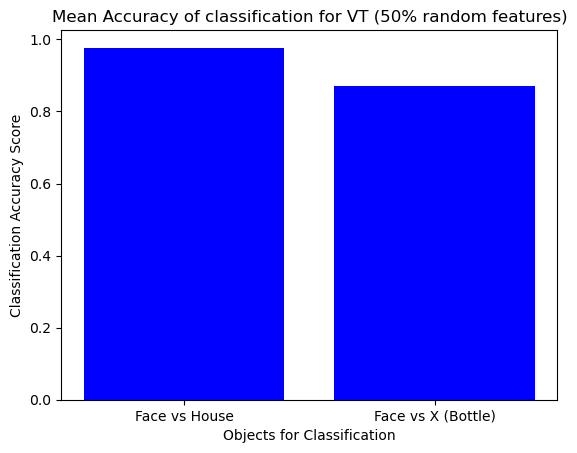

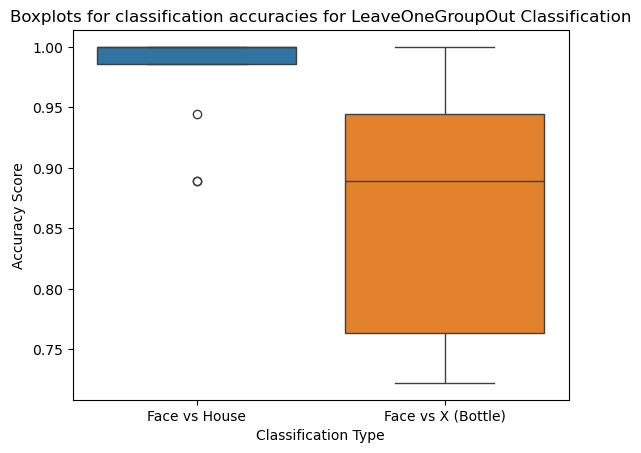

In [141]:
plt.bar(['Face vs House','Face vs X (Bottle)'], [vthalf_fvh,vthalf_fvx], color='blue')
plt.xlabel('Objects for Classification')
plt.ylabel('Classification Accuracy Score')
plt.title('Mean Accuracy of classification for VT (50% random features)')
plt.show()
df = pd.DataFrame({'Face vs House': acc_vthfh, 'Face vs X (Bottle)': acc_vthfx})
sns.boxplot(data=df)
plt.xlabel('Classification Type')
plt.ylabel('Accuracy Score')
plt.title('Boxplots for classification accuracies for LeaveOneGroupOut Classification')
plt.show()

### ROI (Superior Frontal for me) (All Features)

#### Face vs House

In [142]:
condition_mask = conditions.isin(["face", "house"])
condition_mask_array = np.array(condition_mask)
X = dt_roi[condition_mask_array]
y = conditions[condition_mask]
lab_enc=LabelEncoder()
y_enc=lab_enc.fit_transform(y)
group_size=int(X.shape[0]/12)
acc_roifh=[]
for i in range(12):
    start=i*group_size
    end=(i+1)*group_size
    test_x=X[start:end,:]
    test_y=y_enc[start:end]
    train_x=np.concatenate([X[:start, :], X[end:, :]])
    train_y=np.concatenate([y_enc[:start], y_enc[end:]])
    scalar=StandardScaler()
    train_x=scalar.fit_transform(train_x)
    test_x=scalar.transform(test_x)
    classifier=LinearSVC(dual='auto')
    classifier.fit(train_x,train_y)
    pred=classifier.predict(test_x)
    acc_roifh.append(accuracy_score(test_y,pred))
roi_fvh=np.mean(acc_roifh)
print(np.mean(acc_roifh))
std_roifh=np.std(acc_roifh)
print(np.std(acc_roifh))

0.5277777777777778
0.1388888888888889


#### Face vs X (X is 'Bottle' for me)

In [143]:
condition_mask = conditions.isin(["face", "bottle"])
condition_mask_array = np.array(condition_mask)
X = dt_roi[condition_mask_array]
y = conditions[condition_mask]
lab_enc=LabelEncoder()
y_enc=lab_enc.fit_transform(y)
group_size=int(X.shape[0]/12)
acc_roifx=[]
for i in range(12):
    start=i*group_size
    end=(i+1)*group_size
    test_x=X[start:end,:]
    test_y=y_enc[start:end]
    train_x=np.concatenate([X[:start, :], X[end:, :]])
    train_y=np.concatenate([y_enc[:start], y_enc[end:]])
    scalar=StandardScaler()
    train_x=scalar.fit_transform(train_x)
    test_x=scalar.transform(test_x)
    classifier=LinearSVC(dual='auto')
    classifier.fit(train_x,train_y)
    pred=classifier.predict(test_x)
    acc_roifx.append(accuracy_score(test_y,pred))
roi_fvx=np.mean(acc_roifx)
print(np.mean(acc_roifx))
std_roifx=np.std(acc_roifx)
print(np.std(acc_roifx))

0.513888888888889
0.14366778378873057


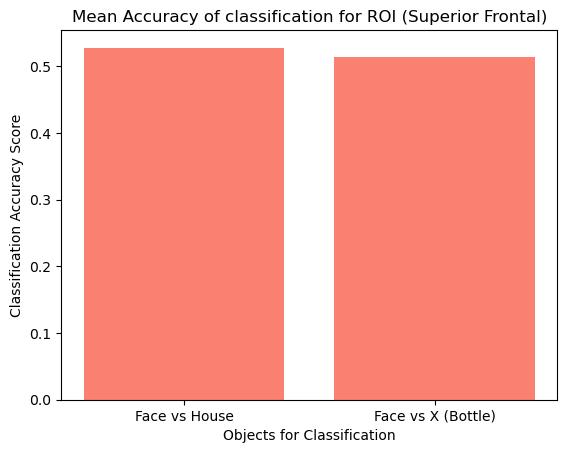

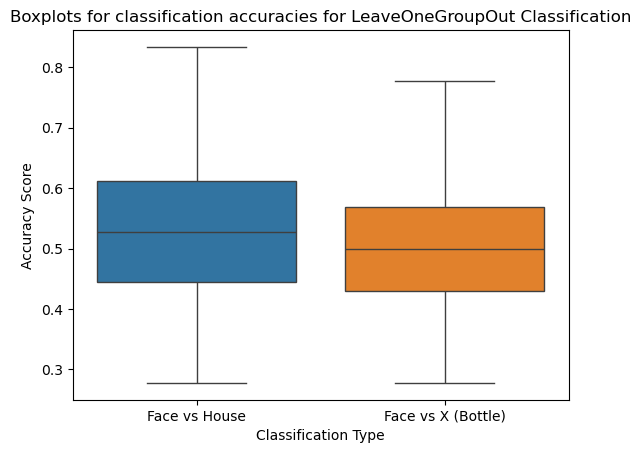

In [144]:
plt.bar(['Face vs House','Face vs X (Bottle)'], [roi_fvh,roi_fvx], color='salmon')
plt.xlabel('Objects for Classification')
plt.ylabel('Classification Accuracy Score')
plt.title('Mean Accuracy of classification for ROI (Superior Frontal)')
plt.show()
df = pd.DataFrame({'Face vs House': acc_roifh, 'Face vs X (Bottle)': acc_roifx})
sns.boxplot(data=df)
plt.xlabel('Classification Type')
plt.ylabel('Accuracy Score')
plt.title('Boxplots for classification accuracies for LeaveOneGroupOut Classification')
plt.show()

### Accuracy of classification for the 3 diffferent cases

#### Face vs House

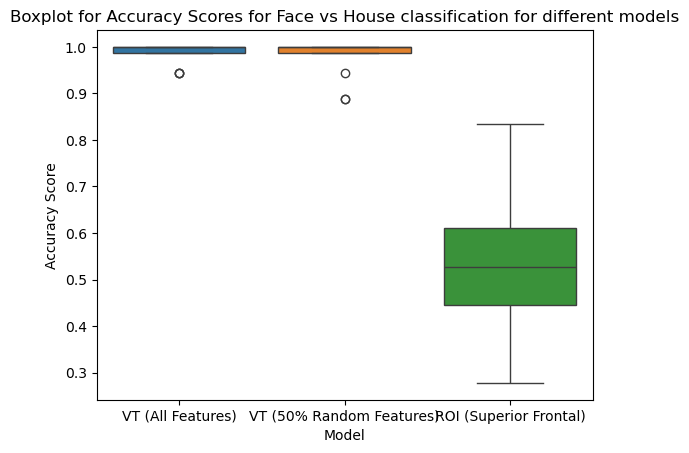

In [145]:
df = pd.DataFrame({'VT (All Features)': acc_vtfh, 'VT (50% Random Features)': acc_vthfh, 'ROI (Superior Frontal)': acc_roifh})
sns.boxplot(data=df)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Boxplot for Accuracy Scores for Face vs House classification for different models')
plt.show()

#### Face vs X (X is 'Bottle' for me)

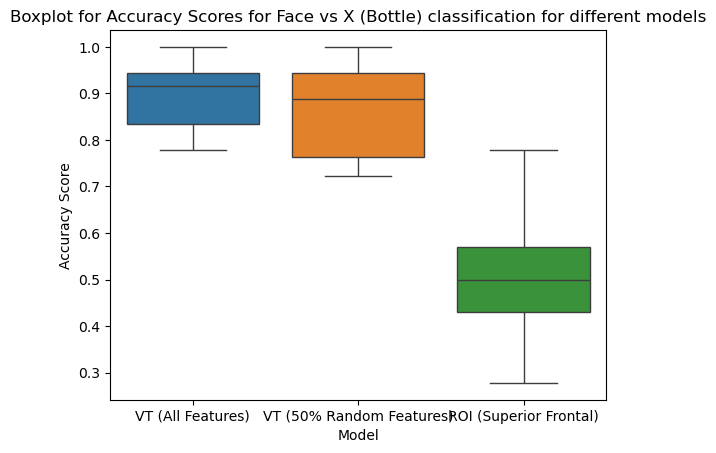

In [146]:
df = pd.DataFrame({'VT (All Features)': acc_vtfx, 'VT (50% Random Features)': acc_vthfx, 'ROI (Superior Frontal)': acc_roifx})
sns.boxplot(data=df)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Boxplot for Accuracy Scores for Face vs X (Bottle) classification for different models')
plt.show()

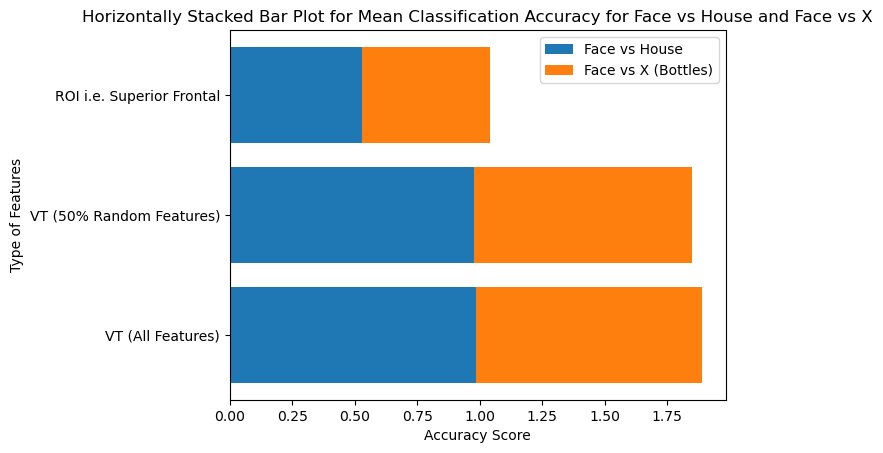

In [147]:
x=['VT (All Features)', 'VT (50% Random Features)', 'ROI i.e. Superior Frontal']
y_1=[vt_fvh, vthalf_fvh, roi_fvh]
y_2=[vt_fvx, vthalf_fvx, roi_fvx]
fig, ax = plt.subplots()
ax.barh(x, y_1, label='Face vs House')
ax.barh(x, y_2, left=y_1, label='Face vs X (Bottles)')
ax.set_xlabel('Accuracy Score')
ax.set_ylabel('Type of Features')
ax.set_title('Horizontally Stacked Bar Plot for Mean Classification Accuracy for Face vs House and Face vs X')
ax.legend()
plt.show()

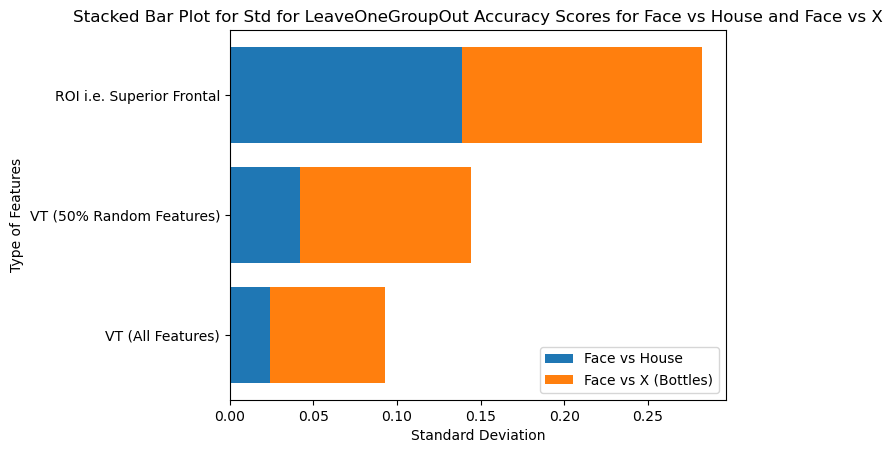

In [148]:
x=['VT (All Features)', 'VT (50% Random Features)', 'ROI i.e. Superior Frontal']
y_1=[std_vtfh, std_vthfh, std_roifh]
y_2=[std_vtfx, std_vthfx, std_roifx]
fig, ax = plt.subplots()
ax.barh(x, y_1, label='Face vs House')
ax.barh(x, y_2, left=y_1, label='Face vs X (Bottles)')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Type of Features')
ax.set_title('Stacked Bar Plot for Std for LeaveOneGroupOut Accuracy Scores for Face vs House and Face vs X')
ax.legend()
plt.show()